In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Logistic Module on Bank Loan

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [5]:
y = df["Personal Loan"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [8]:
df=df.drop('ID',axis=1)

In [10]:
df = df.drop('ZIP Code',axis=1)

In [11]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [13]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [23]:
x = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

In [24]:
import statsmodels.api as sm

In [25]:
c = sm.add_constant(x)

In [26]:
logistic = sm.Logit(y,c)

In [27]:
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        14:46:43   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

## Except Age, Experience and Mortage all are significant variables¶
## as p value of this 3 is > 0.05

## Making Module

In [31]:
##pval = 1/ 1+e^-(-12.1928 + 0.0546*(income) + 0.6958*(Family) + 0.1240*(CCAvg) + 1.7362*(Education) - 0.9368*(Securities Account)
#        + 3.8225*(CD Account) -0.6752*(Online) - 1.1197*(CreditCard))

# we here multiply all the coefficients obtained from table above and multiply it with real values to get output

import math
pval = 1/(1+math.exp(-(-12.1928 + 0.0546*(49) + 0.6958*(4) + 0.1240*(1.6) + 1.7362*(1) - 0.9368*(1)+ 3.8225*(0) -0.6752*(0) - 1.1197*(0))))

if pval>0.5:
    print("probabilty of getting loan is more")
else:
    print("probabilty of getting loan is less")

probabilty of getting loan is less


# Attrition Analysis using Logistic regression

In [46]:
atdata = pd.read_csv("general_data.csv")

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = preprocessing.LabelEncoder()

In [49]:
atdata['Attrition'] = le.fit_transform(atdata.Attrition)
atdata['BusinessTravel'] = le.fit_transform(atdata.BusinessTravel)
atdata['Department'] = le.fit_transform(atdata.Department)
atdata['EducationField'] = le.fit_transform(atdata.EducationField)
atdata['Gender'] = le.fit_transform(atdata.Gender)
atdata['JobRole'] = le.fit_transform(atdata.JobRole)
atdata['MaritalStatus'] = le.fit_transform(atdata.MaritalStatus)
atdata['Over18'] = le.fit_transform(atdata.Over18)

In [50]:
atdata.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [52]:
atdata.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [56]:
atdata = atdata.fillna(method='bfill')
atdata = atdata.fillna(method='ffill')
atdata.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [57]:
atdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [109]:
x = atdata[['Age','MonthlyIncome','TotalWorkingYears']]

In [110]:
y= atdata.Attrition

In [111]:
# constant
import statsmodels.api as sm
x1= sm.add_constant(x)

In [112]:
logi = sm.Logit(y,x1)

In [113]:
res = logi.fit()

Optimization terminated successfully.
         Current function value: 0.422341
         Iterations 6


In [114]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4406
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                 0.04382
Time:                        16:07:00   Log-Likelihood:                -1862.5
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 8.969e-37
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1042      0.197     -0.528      0.598      -0.491       0.283
Age                  -0.0232      0.006     -3.635      0.000      -0.036      -0.011
MonthlyIncome     -2.314e-06   9.27e-07     -2.495      0.013   -4.13e-06   -4.96e-07
TotalWorkingYears    -0.0583      0.009     -6.613      0.000      -0.076      -0.041
=====================================================================================
"""

In [115]:
import math
#pval = 1/(1+math.exp(-(-0.1042 - 0.0232*(age) - 2.314e-06*(Monthlyincome) -0.0583*(TotalWorkingYears))))

pval = 1/(1+math.exp(-(-0.1042 - 0.0232*(31) - 2.314e-06*(41890) -0.0583*(6))))

if pval>0.5:
    print("Their is high chance of attrition")
else:
    print("Their is low chance of attrition")

Their is low chance of attrition


# Linear Regression Model for Real estate analysis

In [116]:
data = pd.read_excel("Linear Regression.xlsx", sheet_name=0)

In [119]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


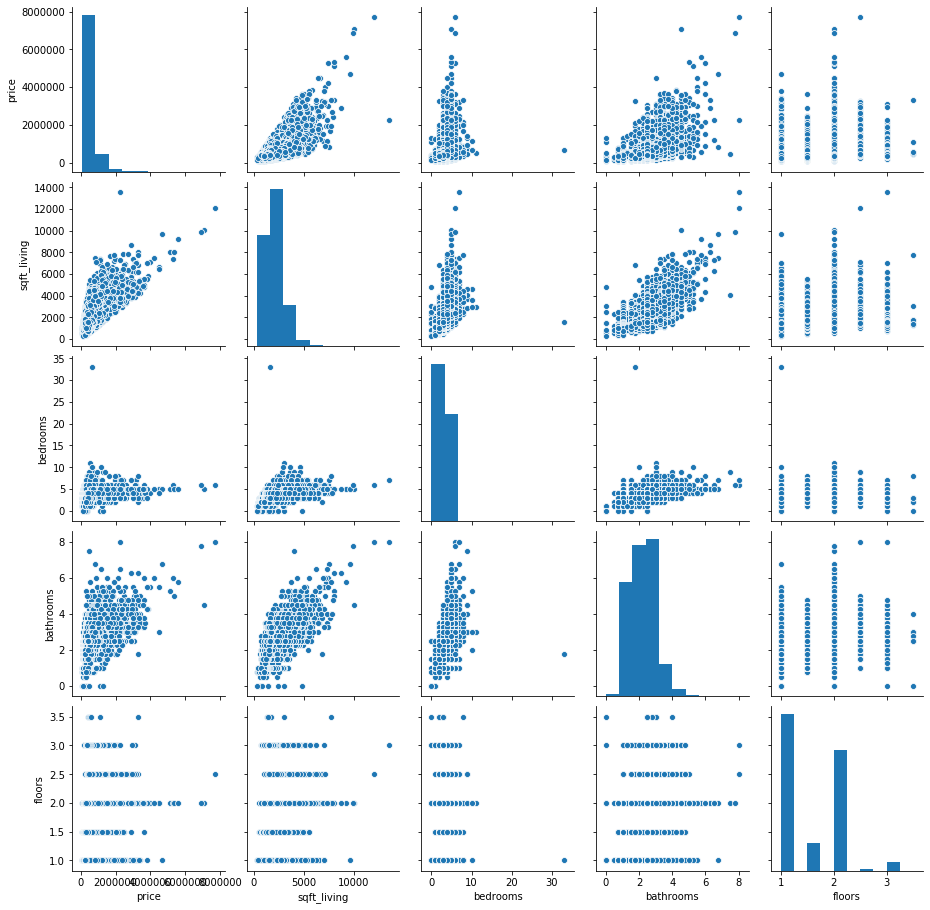

In [123]:
sns.pairplot(data)

# Model 1 : price and sqft_living

In [124]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [136]:
x = data.iloc[:,1:2]

In [139]:
y = data.iloc[:,0:1]

## Seperating training and testing data

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

## Model Building

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lin_reg = LinearRegression(normalize=True)

## Training Module

In [144]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [145]:
lin_reg.coef_

array([[280.67382569]])

In [146]:
lin_reg.intercept_


array([-42568.70358496])

## Visualizing

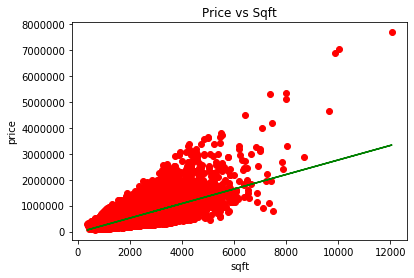

In [152]:


plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price vs Sqft')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

## Testing

In [153]:
ypred = lin_reg.predict(x_test)

In [154]:
ypred

array([[633855.21632509],
       [566493.49815977],
       [364408.34366382],
       ...,
       [701216.9344904 ],
       [187583.83347987],
       [465450.9209118 ]])

In [157]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test,ypred))
rsq = r2_score(y_test, ypred)

print("Rmse = ",rmse,"\n r^2 = ",rsq)

Rmse =  263380.00189817196 
 r^2 =  0.5031163723285275


## Prediction

In [160]:
val = lin_reg.predict(np.array([[2570]]))
val

array([[678763.0284353]])

### Similary we do the process for other features

# Module 2: Price  and  Bedrooms

In [161]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [163]:
x = data.iloc[:,2:3]

In [164]:
y = data.iloc[:,0:1]

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [166]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

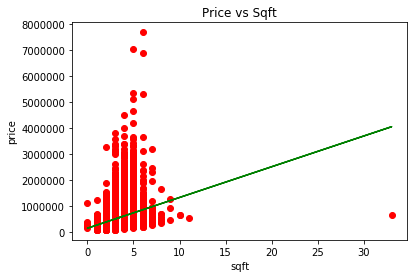

In [167]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price vs Sqft')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

In [168]:
ypred = lin_reg.predict(x_test)

In [169]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test,ypred))
rsq = r2_score(y_test, ypred)

print("Rmse = ",rmse,"\n r^2 = ",rsq)

Rmse =  352717.9654187645 
 r^2 =  0.10886345250291574


In [170]:
val = lin_reg.predict(np.array([[1]]))

In [171]:
val

array([[258613.50391255]])

# Model 3 : Price and Bathrooms

In [176]:
x = data.iloc[:,3:4]
y = data.iloc[:,0:1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

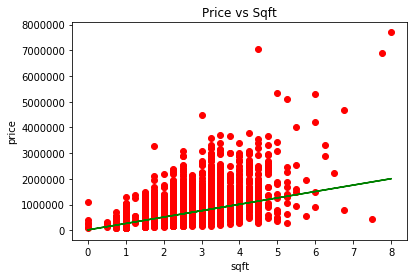

In [177]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price vs Sqft')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

In [178]:
ypred = lin_reg.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test,ypred))
rsq = r2_score(y_test, ypred)

print("Rmse = ",rmse,"\n r^2 = ",rsq)

Rmse =  316774.90190998075 
 r^2 =  0.28122887124177365


In [179]:
val = lin_reg.predict(np.array([[1]]))
val

array([[262217.95379147]])

# Model 4: Price vs Floors

In [182]:
x = data.iloc[:,-1:]
y = data.iloc[:,0:1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

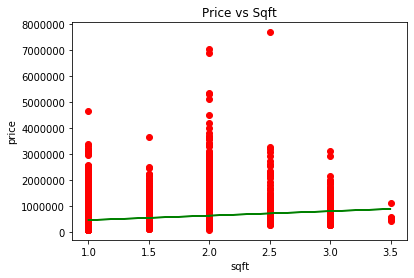

In [183]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lin_reg.predict(x_train), color='green')
plt.title('Price vs Sqft')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

In [184]:
ypred = lin_reg.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test,ypred))
rsq = r2_score(y_test, ypred)

print("Rmse = ",rmse,"\n r^2 = ",rsq)

Rmse =  359677.77234107786 
 r^2 =  0.07334879766874769


In [185]:
val = lin_reg.predict(np.array([[2]]))
val

array([[626062.82370833]])

# Model 5 : Multiple Regression , Price vs all other attributes

In [187]:
x = data.iloc[:,1:]
y = data.iloc[:,0:1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [189]:
ypred = lin_reg.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test,ypred))
rsq = r2_score(y_test, ypred)

print("Rmse = ",rmse,"\n r^2 = ",rsq)

Rmse =  259763.19584802483 
 r^2 =  0.5166693554435362


In [196]:
val = lin_reg.predict(np.array([[3,1180,1,1]]))
val

array([[-67825338.54486671]])

In [198]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


## All models performence is not that good, only model 1 has good performance as correlation between price and sqft is good